In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Loading Data

In [ ]:
ib = pd.read_csv("Churn_Modelling.csv")
ib.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Descriptive Statistics

In [ ]:
ib.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
ib[["NumOfProducts" ,"HasCrCard", "IsActiveMember"]] = ib[["NumOfProducts" ,"HasCrCard", "IsActiveMember"]].astype(str)

In [ ]:
ib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  object 
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


In [ ]:
ib.drop("RowNumber",axis=1,inplace=True)

# Visualization

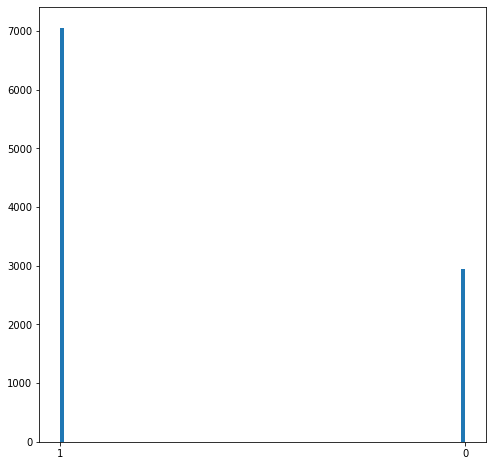

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(ib.HasCrCard,bins=int(np.sqrt(len(list(ib.HasCrCard)))))
plt.show()

In [ ]:
ib2 = ib.sort_values(by="EstimatedSalary")
ib2.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,15791053,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
9647,15679693,Walker,625,France,Male,31,5,0.00,2,0,1,90.07,0
9010,15786463,Hsing,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1
5548,15639662,Phillips,710,France,Male,38,2,0.00,2,1,0,96.27,0
4989,15602851,Ozioma,629,France,Male,40,9,0.00,1,1,0,106.67,0


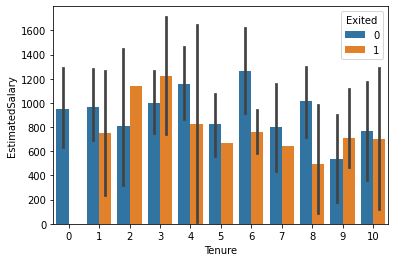

In [ ]:
sns.barplot(y=  "EstimatedSalary",x="Tenure",hue="Exited",data=ib2[:100])

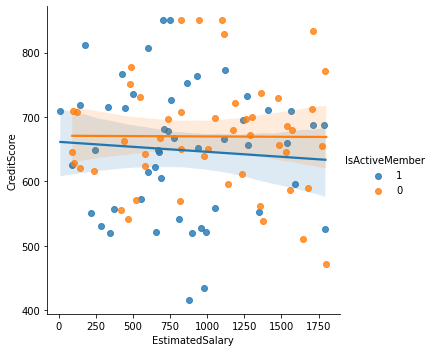

In [ ]:
sns.lmplot(x = "EstimatedSalary",y = "CreditScore",hue="IsActiveMember",data=ib2[:100])

## Handling Missing Value

There is no missing value so no need to do any preprocessing for null values

In [ ]:
ib.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
num = ib.select_dtypes(include=["float64","int64"])
num.head()

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
0,15634602,619,42,2,0.00,101348.88,1
1,15647311,608,41,1,83807.86,112542.58,0
2,15619304,502,42,8,159660.80,113931.57,1
3,15701354,699,39,1,0.00,93826.63,0
4,15737888,850,43,2,125510.82,79084.10,0


# Outlier Remover

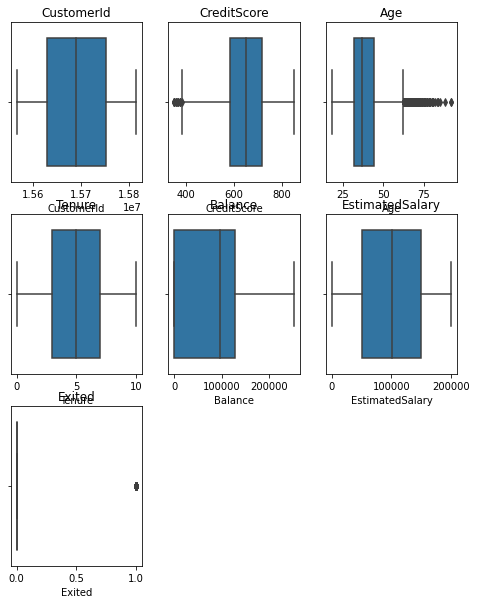

In [ ]:
figure = plt.figure(figsize = (8,10))
for i,j in enumerate(num.columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(num[j])
  plt.title(j)
 

In [ ]:
ib.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ib.size

130000

In [ ]:
Q1 = ib.quantile(0.25)
Q3 = ib.quantile(0.75)
IQR = Q3 - Q1
ib = ib[~((ib < (Q1 - 1.5 * IQR)) |(ib > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
ib.size

99801

In [ ]:
ib.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


# Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
num = num.drop("Exited",axis=1)
ib[num.columns] = StandardScaler().fit_transform(ib[num.columns])


## OneHotEncoding

In [ ]:
cat = ib.select_dtypes(exclude=["int64","float64"])
cat.columns

Index(['Surname', 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember'],
      dtype='object')

In [ ]:
mod = ib.drop(["Surname","CustomerId"],axis=1)
ib  = pd.get_dummies(drop_first=True,data=mod)
ib.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,HasCrCard_1,IsActiveMember_1
1,-0.455004,0.599817,-1.403186,0.174070,0.221181,0,0,1,0,0,0,0,1
3,0.496133,0.350214,-1.403186,-1.159714,-0.104937,0,0,0,0,1,0,0,0
4,2.074392,0.849420,-1.055481,0.837764,-0.361820,0,0,1,0,0,0,1,1
6,1.781735,1.723029,0.683046,-1.159714,-1.564488,0,0,0,1,1,0,1,1
8,-1.573373,0.974221,-0.360070,1.100999,-0.434020,0,0,0,1,1,0,0,1


# Splitting The Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ib.drop("Exited",axis=1),ib["Exited"], test_size=0.33, random_state=43)

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,HasCrCard_1,IsActiveMember_1
2300,-0.005566,1.099022,1.726162,1.003475,-1.413416,0,1,0,0,0,1,0
2745,0.036242,1.972631,1.378457,1.143104,-0.885573,1,0,1,0,0,1,1
9518,-0.695401,0.974221,0.683046,1.448209,0.217533,1,0,1,0,0,1,1
1678,-0.852182,-2.270614,-0.360070,0.157512,-0.488535,0,0,0,0,0,1,0
8180,0.966475,0.724618,-1.403186,0.629425,-0.293187,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8108,-2.242304,-0.148991,0.335341,0.858335,1.067856,1,0,1,1,0,1,1
3039,1.854899,-1.272203,1.030751,0.454688,-1.403106,0,1,0,1,0,1,1
3014,-0.245963,0.849420,-0.707775,1.783354,0.402309,0,1,1,0,0,1,0
4467,-1.186647,-0.648196,-1.403186,-1.159714,-1.715861,0,0,1,1,0,1,0
